<h1><center></center></h1>
<h1><center>Internship on DSA-Project 2</center></h1>
<h1><center>Customer Segmentation for Marketing Strategy</center></h1>

# Phase 1: Week 1 - Project Kick-off and Data Collection

## 1.0 Dataset Description


### **Description of the variables in the dataset:**

#### **Bank client data:**

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4. education (categorical: 'primary', 'secondary', 'tertiary', 'unknown')
5. default: has credit in default? (categorical: 'no','yes','unknown')
housing: has housing loan? (categorical: 'no','yes','unknown')
6. balance: bank balance
7. loan: has personal loan? (categorical: 'no','yes','unknown')

#### **Related with the last contact of the current campaign:**

1. communication_type: contact communication type (categorical: 'cellular','telephone')
2. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
3. day_of_month: last contact day of the month (categorical:1 to 31)
4. last_contact_duration: last contact duration, in seconds (numeric).

#### **Other attributes:**

1. num_contacts_in_campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
2. days_since_prev_campaign_contact: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
3. num_contacts_prev_campaign: number of contacts performed before this campaign and for this client (numeric)
4. prev_campaign_outcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
Social and economic context attributes:

#### **Output variable (desired target):**

1. term_deposit_subscribed - has the client subscribed a term deposit? (binary: 'yes','no')

## 1.1 Import Dependencies and Data Collection

### 1.1.1 Importing necessary libraries

#### MLFLow

In [ ]:
pip install mlflow --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.3/26.3 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 70.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.5/109.5 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1

In [ ]:
!mlflow

#### importing necessary libraries

In [ ]:
pip install yellowbrick --quiet

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score


from sklearn.metrics import classification_report

from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram

In [ ]:
import mlflow
import mlflow.sklearn

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment('Segmentation')

mlflow.sklearn.autolog(disable=True)

2024/07/31 11:48:11 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/07/31 11:48:11 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### 1.1.2 Importing Data

In [ ]:
# loading the Training dataset and saving it as cust_seg_data
cust_seg_data = pd.read_csv('/content/Train.csv')

In [ ]:
#copying and saving the dataset as data inorder to retain the original dataset
data = cust_seg_data.copy()
data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


### 1.1.3 Understanding the DataFrame

In [ ]:
# displays the size of the dataset
data.shape

(21811, 18)

The Dataframe contains **31647 rows** and **18 columns**

In [ ]:
# gives an idea about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21811 entries, 0 to 21810
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                21811 non-null  object 
 1   customer_age                      21377 non-null  float64
 2   job_type                          21811 non-null  object 
 3   marital                           21712 non-null  object 
 4   education                         21811 non-null  object 
 5   default                           21811 non-null  object 
 6   balance                           21542 non-null  float64
 7   housing_loan                      21811 non-null  object 
 8   personal_loan                     21700 non-null  object 
 9   communication_type                21811 non-null  object 
 10  day_of_month                      21811 non-null  int64  
 11  month                             21811 non-null  object 
 12  last

In [ ]:
# gives the count of different datatypes variables in the dataset
data.dtypes.value_counts()

object     10
float64     5
int64       3
Name: count, dtype: int64

In [ ]:
# counts the number of null values
data.isna().sum()

id                                      0
customer_age                          434
job_type                                0
marital                                99
education                               0
default                                 0
balance                               269
housing_loan                            0
personal_loan                         111
communication_type                      0
day_of_month                            0
month                                   0
last_contact_duration                 227
num_contacts_in_campaign               73
days_since_prev_campaign_contact    17794
num_contacts_prev_campaign              0
prev_campaign_outcome                   0
term_deposit_subscribed                 0
dtype: int64

#### From the above metrics we can conclude that:
* There are **7** Features or columns having null values, columns consists of **5 numericals columns** and **2 Catergorical columns**
* The Feature **"days_since_prev_campaign_contact"** is having **25831 rows** of null values which is **81.6%** of total rows and this feature **must be Removed**.
* The other 6 Features can be imputed using various techniques.

In [ ]:
# displays the count of duplicates
data.duplicated().sum()

0

In [ ]:
# gives the count of unique values in the variables
data.nunique()

id                                  21811
customer_age                           75
job_type                               12
marital                                 3
education                               4
default                                 2
balance                              5554
housing_loan                            2
personal_loan                           2
communication_type                      3
day_of_month                           31
month                                  12
last_contact_duration                1335
num_contacts_in_campaign               45
days_since_prev_campaign_contact      471
num_contacts_prev_campaign             38
prev_campaign_outcome                   4
term_deposit_subscribed                 2
dtype: int64

#### From the above metrics conclusion is made:
* **id** columns contains unique values and should be removed.


### 1.1.4 Removing Columns

In [ ]:
data.drop(['id','days_since_prev_campaign_contact'], axis=1, inplace=True)

In [ ]:
data.shape

(21811, 16)

## 1.2 Data Preprocessing - Missing value imputation

### 1.2.1 Analysing distributions of Feature with null values .

In [ ]:
# Extracting columns having null values
col = data.columns
imp_list=[]
for i in col:
  if data[i].isna().sum() > 0:
    imp_list.append(i)

imp_list

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign']

In [ ]:
# classifying null value columns into numerical and categorical
num_imp_list = data[imp_list].select_dtypes(include='number').columns
cat_imp_list = data[imp_list].select_dtypes(include='object').columns
num_imp_list, cat_imp_list

(Index(['customer_age', 'balance', 'last_contact_duration',
        'num_contacts_in_campaign'],
       dtype='object'),
 Index(['marital', 'personal_loan'], dtype='object'))

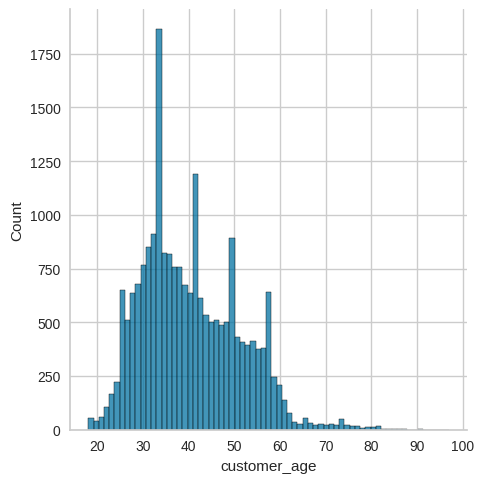

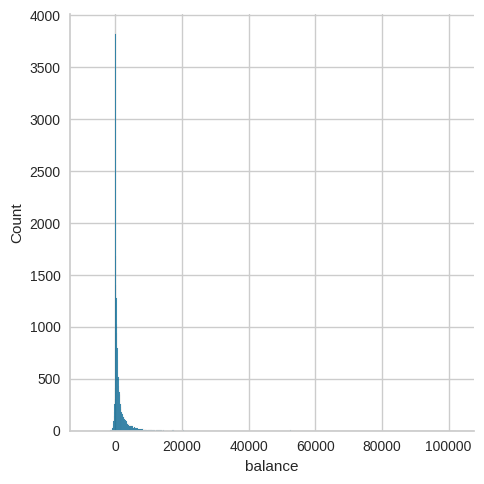

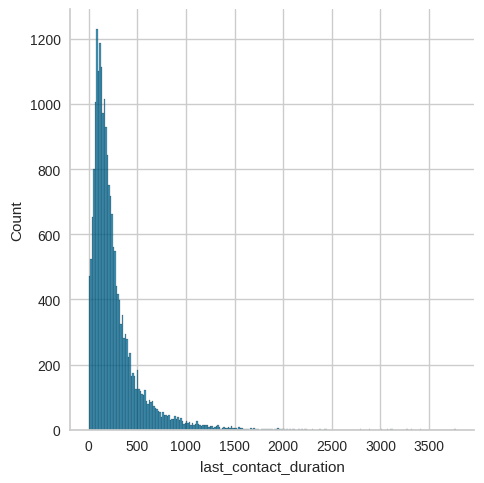

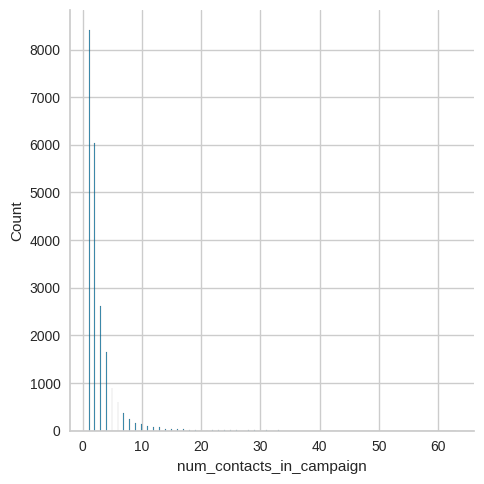

In [ ]:
# analysing the numerical distribution
for i in num_imp_list:
  sns.displot(data[i])
  plt.show()

In [ ]:
# Also checking the skew
for i in num_imp_list:
  sk=round(data[i].skew(),3)
  print(f'Skewness of {i} :::: {sk}')

Skewness of customer_age :::: 0.673
Skewness of balance :::: 9.256
Skewness of last_contact_duration :::: 3.078
Skewness of num_contacts_in_campaign :::: 5.06


#### Conclusion
* From the above Distribution plots and skewness measure we can conclude the numerical features containing null value are **Right Skewed** and need to be imputed using **Median value** in each Feature.
* The Categorical null values must be imputed using **Mode**.

### 1.2.2 Impution missing values.

In [ ]:
# Numerical columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# catergorical columns
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data1 = data.copy()

data1[num_imp_list] = imp_median.fit_transform(data1[num_imp_list])
data1[cat_imp_list] = imp_mode.fit_transform(data1[cat_imp_list])

In [ ]:
data1.isna().sum()

,0
customer_age,0
job_type,0
marital,0
education,0
default,0
balance,0
housing_loan,0
personal_loan,0
communication_type,0
day_of_month,0


## 1.3 Data Preprocessing - Outlier Detection

### 1.3.1 Percentage wise distribution of outliers in each feature.

In [ ]:
numerical_columns = data1.select_dtypes(include=['number']).columns.tolist()

outlier_info = {}

for col in numerical_columns:
    Q1 = data1[col].quantile(0.25)
    Q3 = data1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data1[col] < lower_bound) | (data1[col] > upper_bound)]

    # Calculate the percentage of outliers
    outlier_percentage = (len(outliers) / len(data1)) * 100

    outlier_info[col] = {'Number of Outliers': len(outliers),'Percentage of Outliers': outlier_percentage}

outlier_df = pd.DataFrame.from_dict(outlier_info).transpose()
outlier_df

,Number of Outliers,Percentage of Outliers
customer_age,187.0,0.857366
balance,2352.0,10.783550
day_of_month,0.0,0.000000
last_contact_duration,1587.0,7.276145
num_contacts_in_campaign,1528.0,7.005639
num_contacts_prev_campaign,4017.0,18.417312
term_deposit_subscribed,2367.0,10.852322


### 1.3.2 Function for Analysing Outliers in continuous Features

In [ ]:
df = data.copy()

class DataFrameOutlierDetector:
  def __init__(self, df):
    self.df = df

  def detect_outliers(self, column_name):

    Q1 = self.df[column_name].quantile(0.25)
    Q3 = self.df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = self.df[(self.df[column_name] < lower_bound) | (self.df[column_name] > upper_bound)]

    outlier_df=pd.DataFrame(outliers)
    return outlier_df

  def outlier_describe(self, column_name):

    original_stats = self.df[column_name].describe()
    outlier = self.detect_outliers(column_name)
    non_outliers = self.df[~self.df.index.isin(outlier.index)]
    non_outlier_stats = non_outliers[column_name].describe()

    return pd.DataFrame({
        'with_outliers': original_stats,
        'without_outliers': non_outlier_stats
    })

  def plot_box(self, column_name):

    plt.figure(figsize=(6, 4))
    self.df.boxplot(column=column_name)
    plt.title(f'Box plot of {column_name}')
    plt.ylabel(column_name)
    plt.show()

detector = DataFrameOutlierDetector(df)

#### 1. Customer Age

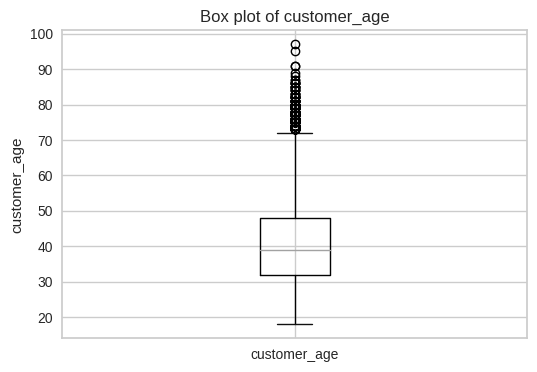

In [ ]:
detector.plot_box('customer_age')

In [ ]:
detector.detect_outliers('customer_age')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
261,78.0,retired,married,secondary,no,8303.0,no,no,telephone,9,jun,730.0,1.0,12,failure,1
302,76.0,retired,married,secondary,no,2656.0,no,no,cellular,10,nov,261.0,5.0,0,unknown,1
521,73.0,retired,married,primary,no,-5.0,no,no,cellular,28,jun,344.0,6.0,6,failure,0
620,88.0,retired,married,primary,no,5235.0,no,no,telephone,1,apr,568.0,2.0,0,unknown,1
638,73.0,retired,divorced,primary,no,803.0,no,no,cellular,9,sep,460.0,5.0,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21598,76.0,retired,married,primary,no,2974.0,no,no,cellular,12,aug,648.0,1.0,0,unknown,1
21600,77.0,retired,married,secondary,no,820.0,no,no,telephone,23,apr,263.0,4.0,0,unknown,1
21651,75.0,retired,married,tertiary,no,7801.0,no,no,telephone,1,feb,494.0,2.0,0,unknown,1
21790,81.0,retired,married,secondary,no,667.0,no,no,telephone,8,jul,255.0,1.0,1,success,1


In [ ]:
detector.outlier_describe('customer_age')

,with_outliers,without_outliers
count,21377.000000,21190.000000
mean,40.438602,40.109108
std,10.777519,10.226926
min,18.000000,18.000000
25%,32.000000,32.000000
50%,39.000000,38.000000
75%,48.000000,48.000000
max,97.000000,72.000000


#### 2. Balance

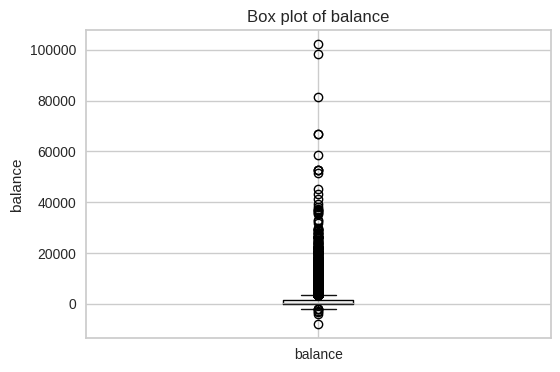

In [ ]:
detector.plot_box('balance')

In [ ]:
detector.detect_outliers('balance')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
11,35.0,technician,single,secondary,no,5212.0,yes,no,cellular,7,may,303.0,2.0,0,unknown,0
13,50.0,management,married,secondary,no,4873.0,no,no,telephone,6,feb,381.0,6.0,9,failure,0
28,45.0,admin.,single,secondary,no,10390.0,yes,no,cellular,20,nov,101.0,1.0,0,unknown,0
47,32.0,management,married,secondary,no,4136.0,yes,no,cellular,12,may,94.0,4.0,0,unknown,0
59,47.0,management,married,tertiary,no,4113.0,no,no,cellular,18,aug,128.0,13.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21758,63.0,retired,divorced,primary,no,3620.0,no,no,cellular,25,nov,340.0,1.0,0,unknown,1
21769,59.0,management,married,tertiary,no,10583.0,no,no,cellular,28,sep,358.0,3.0,3,success,1
21783,56.0,admin.,married,secondary,no,5891.0,no,yes,unknown,11,jun,295.0,3.0,0,unknown,0
21787,35.0,self-employed,divorced,tertiary,no,5721.0,yes,no,cellular,18,nov,158.0,2.0,0,unknown,0


In [ ]:
detector.outlier_describe('balance')

,with_outliers,without_outliers
count,21542.000000,19247.000000
mean,1365.300111,632.099028
std,3112.951680,833.070219
min,-8020.000000,-1855.000000
25%,70.000000,43.000000
50%,451.000000,349.000000
75%,1411.000000,972.000000
max,102128.000000,3422.000000


#### 3. Last Contact Duration

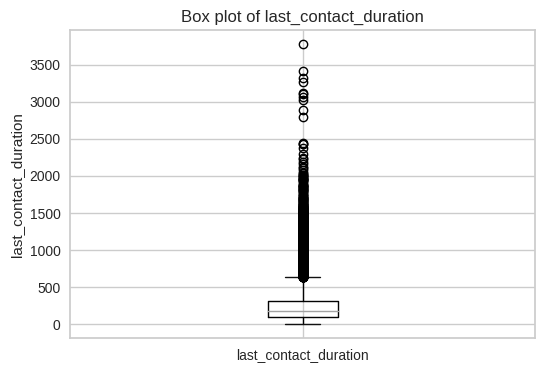

In [ ]:
detector.plot_box('last_contact_duration')

In [ ]:
detector.detect_outliers('last_contact_duration')

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
6,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,687.0,4.0,0,unknown,1
10,52.0,blue-collar,married,tertiary,no,1779.0,no,no,cellular,19,nov,1195.0,3.0,1,failure,0
38,30.0,self-employed,married,secondary,no,580.0,yes,no,cellular,13,oct,834.0,1.0,6,failure,0
53,30.0,management,single,tertiary,no,39.0,yes,no,cellular,15,may,900.0,3.0,2,other,1
79,26.0,technician,single,secondary,no,249.0,no,no,cellular,29,jan,716.0,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21725,57.0,unemployed,married,primary,no,-2.0,no,no,cellular,30,jan,3017.0,2.0,0,unknown,0
21730,31.0,blue-collar,married,primary,no,1209.0,yes,no,cellular,16,apr,695.0,1.0,0,unknown,0
21750,30.0,services,married,secondary,no,-227.0,yes,yes,cellular,16,jul,696.0,1.0,0,unknown,0
21784,56.0,admin.,married,secondary,no,2118.0,no,no,cellular,19,aug,668.0,4.0,0,unknown,1


In [ ]:
detector.outlier_describe('last_contact_duration')

,with_outliers,without_outliers
count,21584.000000,20031.000000
mean,256.995274,202.221656
std,256.542739,139.997311
min,0.000000,0.000000
25%,102.000000,97.000000
50%,180.000000,168.000000
75%,317.000000,275.000000
max,3773.000000,639.000000


### 1.3.4 Conclusion

#### After analysing the Outliers present in the data come to the conclustion that these are **genuine outliers** and not typos or error in the data

## 1.4 Data Transformations - Part 1

### 1.4.1 Converting Months in short name to numeric format  

In [ ]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month short names with month numbers
data1['month'] = data1['month'].replace(month_map)

### 1.4.2 Encoding Binary catergorical columns

In [ ]:
cat_columns = data1.select_dtypes(include=['object']).columns

binary_columns = [col for col in cat_columns if data1[col].nunique() == 2]

ohe = OneHotEncoder(drop='first')

data2 = data1.copy()
le= LabelEncoder()

# Apply LabelEncoder to binary categorical columns
for col in binary_columns:
    data2[col] = le.fit_transform(data2[col])

In [ ]:
data2.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,28.0,management,single,tertiary,0,285.0,1,0,unknown,26,6,303.0,4.0,0,unknown,0
1,34.0,blue-collar,married,secondary,0,934.0,0,1,cellular,18,11,143.0,2.0,1,other,0
2,46.0,technician,married,secondary,0,656.0,0,0,cellular,5,2,101.0,4.0,0,unknown,0
3,34.0,services,single,secondary,0,2.0,1,0,unknown,20,5,127.0,3.0,0,unknown,0
4,41.0,blue-collar,married,primary,0,1352.0,1,0,cellular,13,5,49.0,2.0,0,unknown,0


In [ ]:
data2['job_type'].unique()

array(['management', 'blue-collar', 'technician', 'services', 'retired',
       'entrepreneur', 'admin.', 'student', 'housemaid', 'self-employed',
       'unknown', 'unemployed'], dtype=object)

## 1.5 Exploratory Data Analysis

### 1.5.0 Correlation Heatmap

<Axes: >

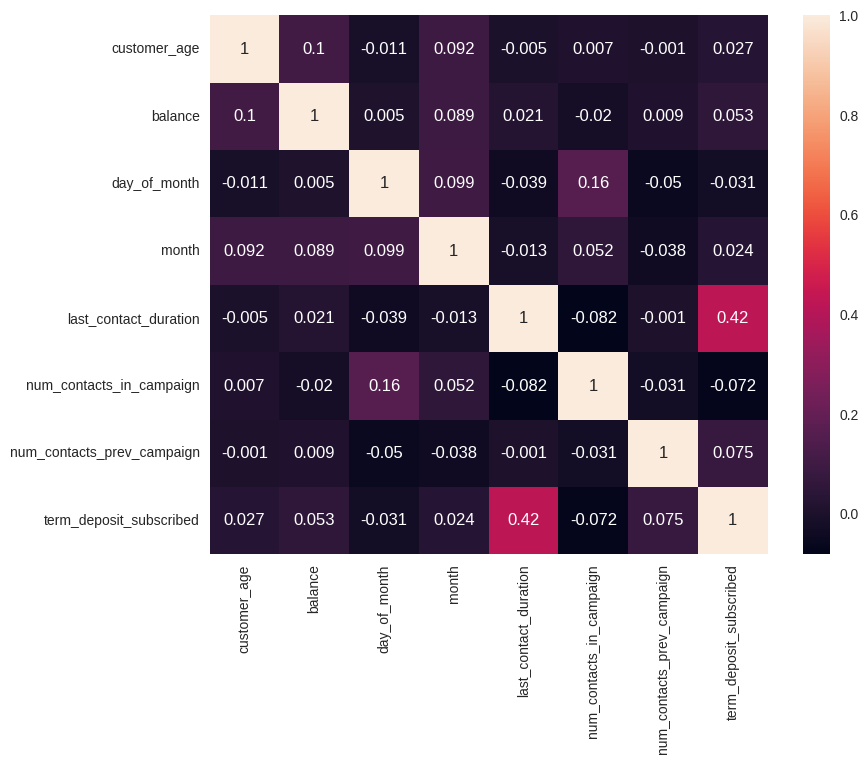

In [ ]:
plt.figure(figsize=(9, 7))
df=round(data1.corr(numeric_only=True),3)
sns.heatmap(df, fmt='.2g', annot=True)

### 1.5.1 Customer Age

#### Distribution

Text(0.5, 0.98, 'Customer distribution by age')

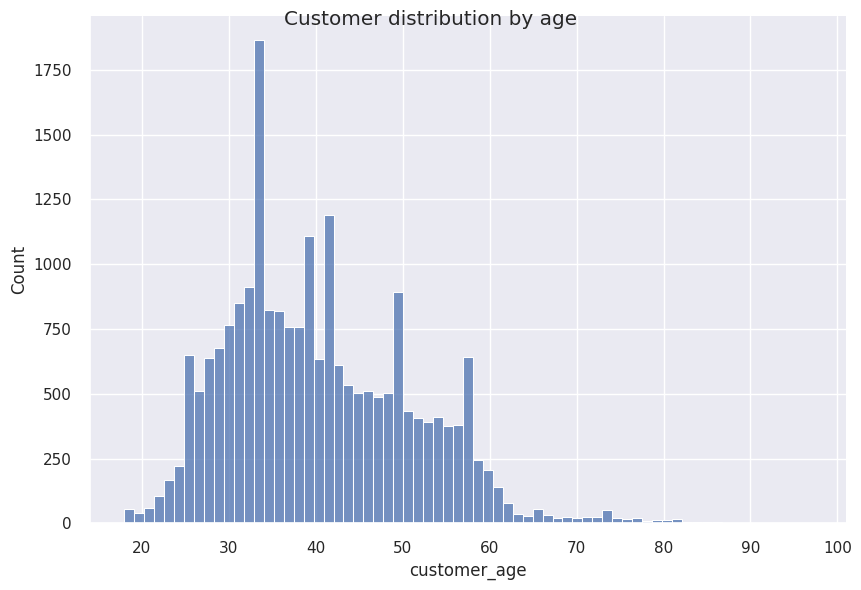

In [ ]:
sns.set_theme(rc={'figure.figsize':(8,5)}) # Figsize can be edited if charts are too large
ax=sns.displot(data=data2,x="customer_age",height=6, aspect=11.7/8)
ax.figure.suptitle("Customer distribution by age")

#### Distribution by age group

Text(0.5, 0.98, 'Customer distribution by Age Group')

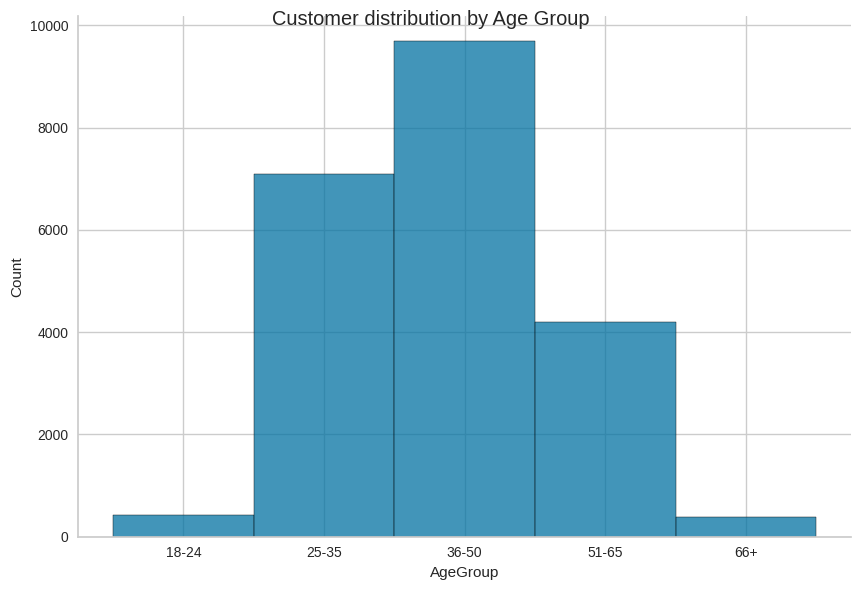

In [ ]:
bins = [18, 24, 35, 50, 65, 100]
labels = ['18-24', '25-35', '36-50', '51-65', '66+']

data2['AgeGroup'] = pd.cut(data2['customer_age'], bins=bins, labels=labels, right=False)

ax1=sns.displot(data=data2,x="AgeGroup",height=6, aspect=11.7/8)
ax1.figure.suptitle("Customer distribution by Age Group")


**Customer distribution by Age Group**:

The Distribution plot provides a more in-depth analysis on customer distribution when plotted in age groups. The graph almost represents a normal distribution and the metrics are as follows.

* Highest proportion of customers are distributed in the age group of 36-50 with about 9500 Individuals.
* Lowest Customer distribution is in the ranges of ages 18-24 and 66+ with both comprising of around 300 customers in each group.

#### Customer balance in each Age Group

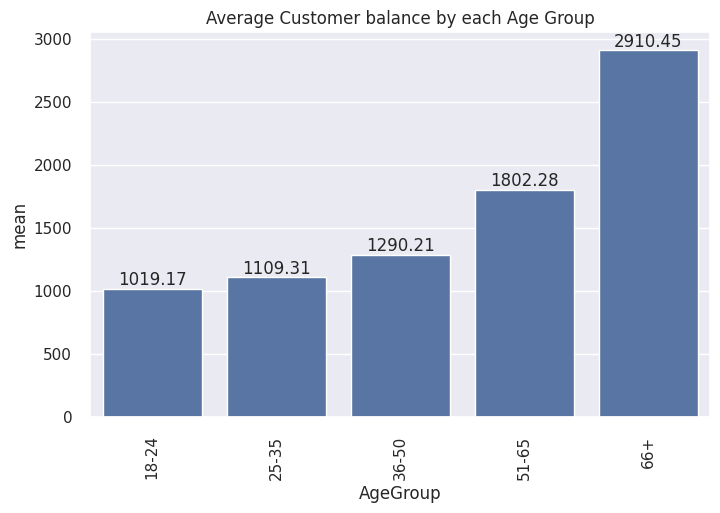

In [ ]:
Bal_vs_age =data2.groupby('AgeGroup')['balance'].agg(['mean']).reset_index()

ax2=sns.barplot(data=Bal_vs_age,x='AgeGroup',y='mean')
ax2.tick_params(axis='x', rotation=90)
ax2.set_title("Average Customer balance by each Age Group")
ax2.bar_label(ax2.containers[0])
plt.show()

**Customer balance in each Age Group**:

The balance amount increases with the Age group, with 18-24 having the lowest average balance of 1019 and gropu 66+ is having the highest balance of 2910.

### 1.5.2 Default

#### Customer default by Age group

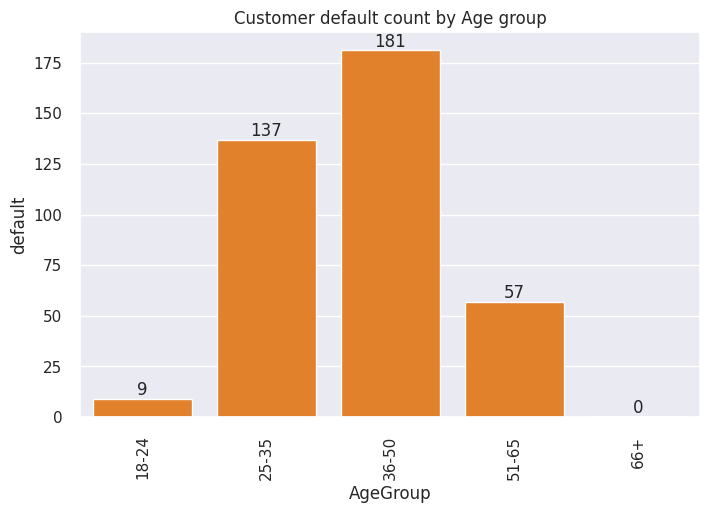

In [ ]:
Def_vs_age =data2.groupby('AgeGroup')['default'].sum().reset_index()

ax3=sns.barplot(data=Def_vs_age,x='AgeGroup',y='default',color="#ff7f0e")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Customer default count by Age group")
ax3.bar_label(ax3.containers[0])
plt.show()

#### Customer default proportion by Age group

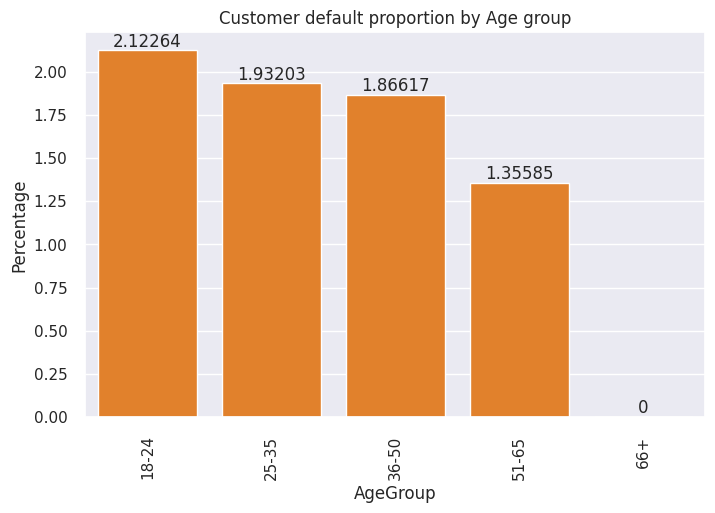

In [ ]:
Def_vs_age =data2.groupby('AgeGroup')['default'].sum().reset_index()
Def=data2['AgeGroup'].value_counts().sort_index().reset_index()
Def_vs_age['Total'] = Def['count']
Def_vs_age['Percentage'] = (Def_vs_age['default'] / Def_vs_age['Total']) * 100

ax3=sns.barplot(data=Def_vs_age,x='AgeGroup',y='Percentage',color="#ff7f0e")
ax3.tick_params(axis='x', rotation=90)
ax3.set_title("Customer default proportion by Age group")
ax3.bar_label(ax3.containers[0])
plt.show()

**Conclusion**:
The proportion of default customers also follows as inverse trend with  **balance** as the highest proportion by total at each group defaulted is from age group 18-24.

#### Customer default proportion by Job Type

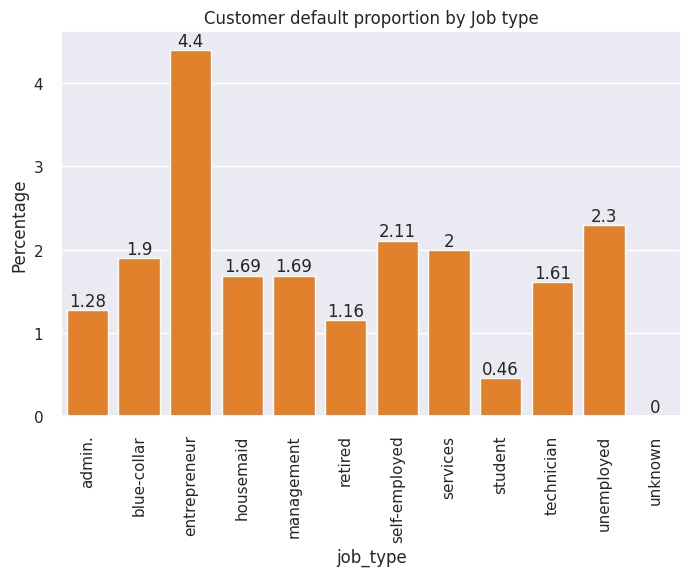

In [ ]:
Def_vs_job =data2.groupby('job_type')['default'].sum().reset_index()
Def=data2['job_type'].value_counts().sort_index().reset_index()
Def_vs_job['Total'] = Def['count']
Def_vs_job['Percentage'] = round(((Def_vs_job['default'] / Def_vs_job['Total']) * 100),2)


ax4=sns.barplot(data=Def_vs_job,x='job_type',y='Percentage',color="#ff7f0e")
ax4.tick_params(axis='x', rotation=90)
ax4.set_title("Customer default proportion by Job type")
ax4.bar_label(ax4.containers[0])
plt.show()

**Conclusion**:
Entrepreneur customers have the highest chance of defaulting with 4.4%, followed by Unemployed customers at 2.3%.

#### Customer default proportion by Marital Status

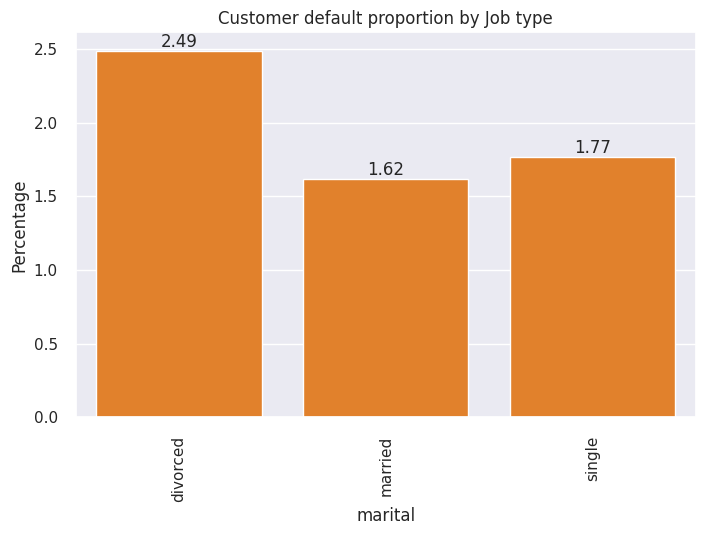

In [ ]:
Def_vs_mar =data2.groupby('marital')['default'].sum().reset_index()
Def=data2['marital'].value_counts().sort_index().reset_index()
Def_vs_mar['Total'] = Def['count']
Def_vs_mar['Percentage'] = round(((Def_vs_mar['default'] / Def_vs_mar['Total']) * 100),2)


ax5=sns.barplot(data=Def_vs_mar,x='marital',y='Percentage',color="#ff7f0e")
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Customer default proportion by Job type")
ax5.bar_label(ax5.containers[0])
plt.show()

### 1.5.3 Balance

#### Customer Average Balance by Job Type

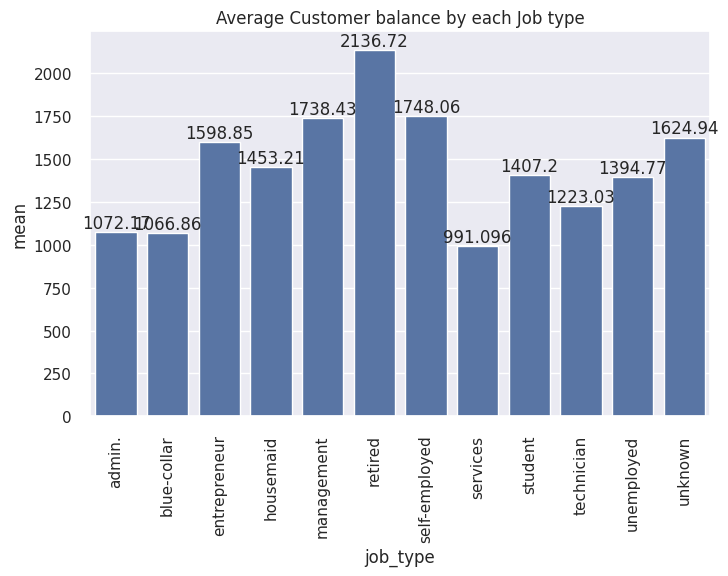

In [ ]:
Bal_vs_job =data2.groupby('job_type')['balance'].agg(['mean']).reset_index()

ax5=sns.barplot(data=Bal_vs_job,x='job_type',y='mean')
ax5.tick_params(axis='x', rotation=90)
ax5.set_title("Average Customer balance by each Job type")
ax5.bar_label(ax5.containers[0])
plt.show()

#### Customer Average Balance by Marital status

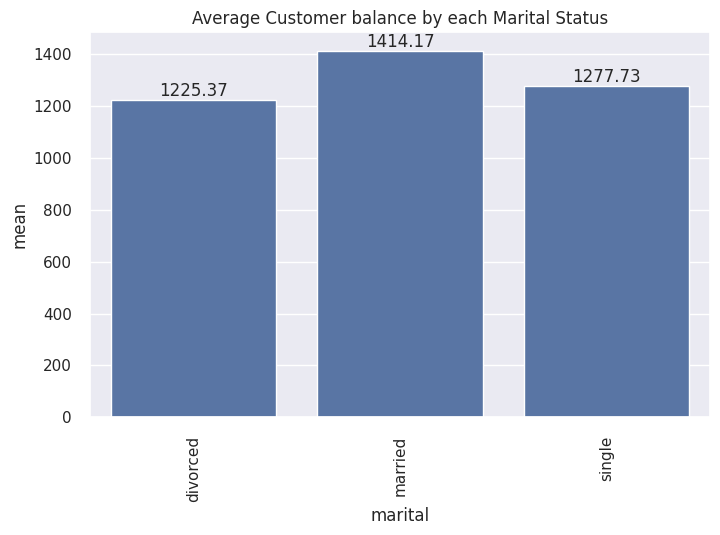

In [ ]:
Bal_vs_mar =data2.groupby('marital')['balance'].agg(['mean']).reset_index()

ax6=sns.barplot(data=Bal_vs_mar,x='marital',y='mean')
ax6.tick_params(axis='x', rotation=90)
ax6.set_title("Average Customer balance by each Marital Status")
ax6.bar_label(ax6.containers[0])
plt.show()

### 1.5.4 Personal Loan

#### Customers with personal loan by Age group

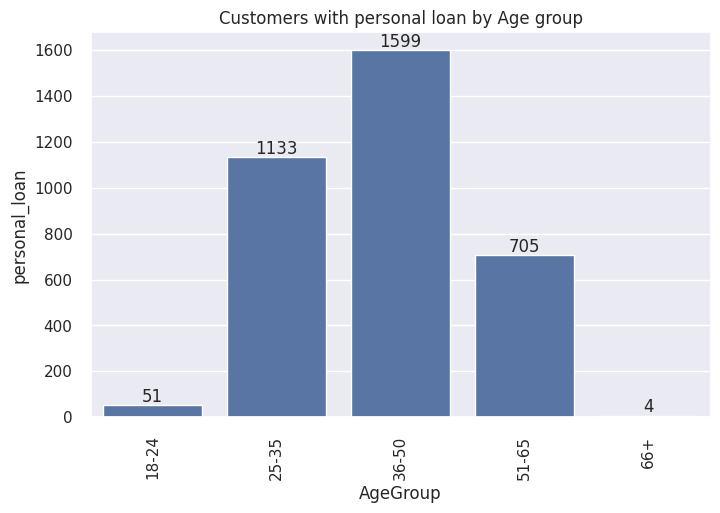

In [ ]:
PL_vs_age =data2.groupby('AgeGroup')['personal_loan'].sum().reset_index()

ax7=sns.barplot(data=PL_vs_age,x='AgeGroup',y='personal_loan')
ax7.tick_params(axis='x', rotation=90)
ax7.set_title("Customers with personal loan by Age group")
ax7.bar_label(ax7.containers[0])
plt.show()

#### Customers with personal loan by proportion

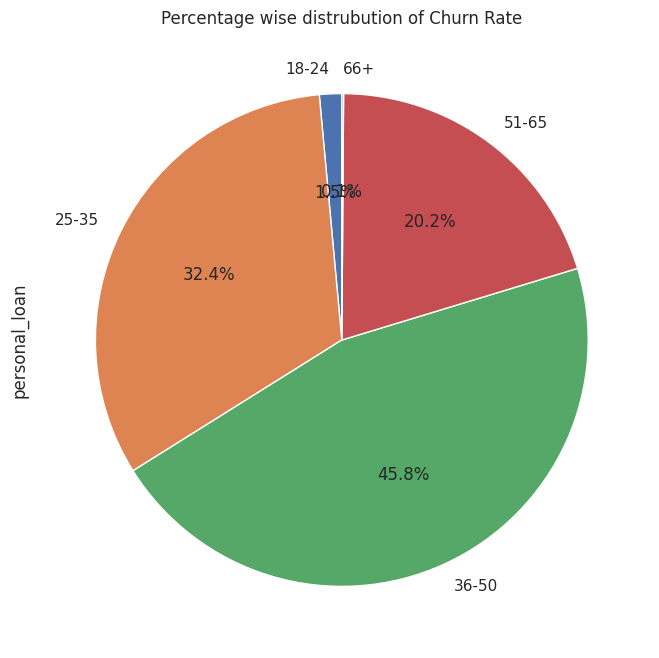

In [ ]:
PL_vs_age =data2.groupby('AgeGroup')['personal_loan'].sum().reset_index()
PL_vs_age["personal_loan"].plot(kind='pie',figsize=(9,8),autopct="%1.1f%%", startangle=90, title='Percentage wise distrubution of Churn Rate',labels=PL_vs_age['AgeGroup'])
plt.show()

#### Customers with personal loan by Marital Status

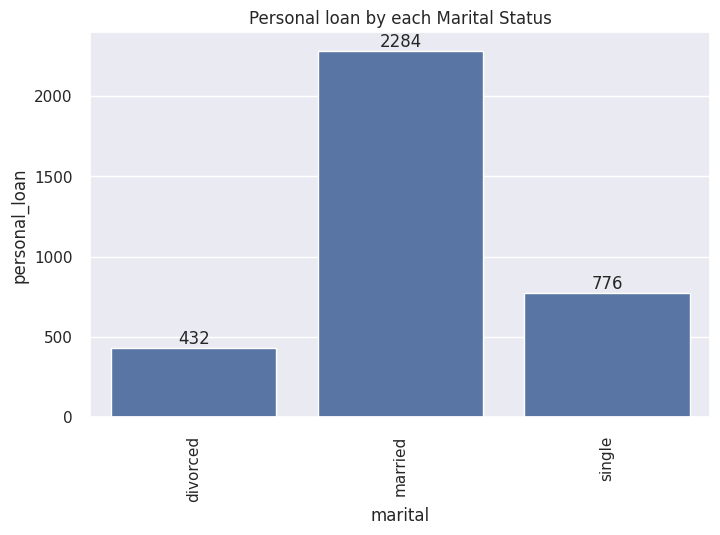

In [ ]:
PL_vs_mar =data2.groupby('marital')['personal_loan'].sum().reset_index()
PL_vs_mar

ax8=sns.barplot(data=PL_vs_mar,x='marital',y='personal_loan')
ax8.tick_params(axis='x', rotation=90)
ax8.set_title("Personal loan by each Marital Status")
ax8.bar_label(ax8.containers[0])
plt.show()

#### Customers with personal loan by Job type

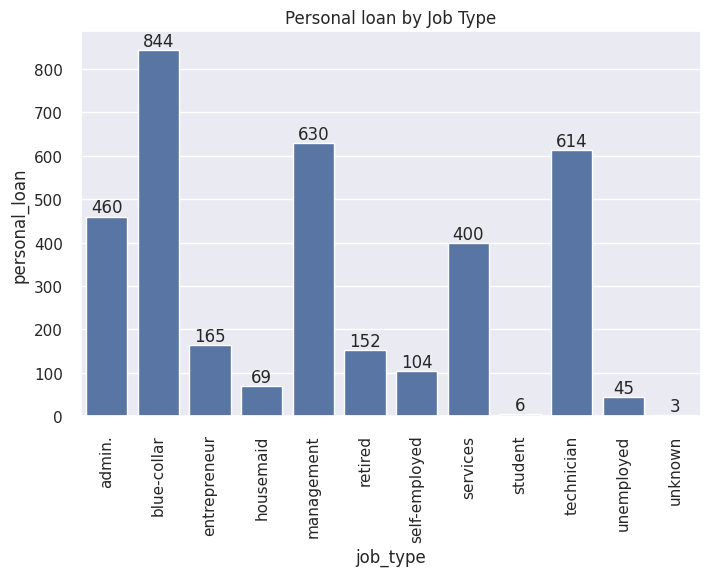

In [ ]:
PL_vs_job =data2.groupby('job_type')['personal_loan'].sum().reset_index()

ax9=sns.barplot(data=PL_vs_job,x='job_type',y='personal_loan')
ax9.tick_params(axis='x', rotation=90)
ax9.set_title("Personal loan by Job Type")
ax9.bar_label(ax9.containers[0])
plt.show()

# Phase 2: Week 2: Classification prediction for Test Data

## 2.1 Functions

### Feature selection Function

In [ ]:
KNN_Imputer = KNNImputer(n_neighbors=1)
Simple_Imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

select_scores = {"Chi Square": chi2,"ANOVA F-value classification": f_classif,"Information Gain Classification": mutual_info_classif}

# Feature selection Function for Supervised
def select_k_best_features(dataframe,target, k, select_scores,score_func):

    fs_data=dataframe.copy()
    fs_data = pd.DataFrame(Simple_Imputer.fit_transform(dataframe),columns=dataframe.columns)

    cat_col=list(fs_data.select_dtypes(include='object').columns)
    le = LabelEncoder()

    for col in cat_col:
        fs_data[col] = fs_data[col].astype(str)
        fs_data[col]=(le.fit_transform(fs_data[col]))

    X=fs_data.drop(target,axis=1)
    y=fs_data[target]

    sf = select_scores[score_func]
    selector = SelectKBest(score_func=sf, k=k)
    selector.fit(X, y)
    mask = selector.get_support()
    selected_features = X.columns[mask]

    return list(selected_features)

### Encoding Function

In [ ]:
def encode_categorical_columns(df):
    df_encoded = df.copy()  # Make a copy of the DataFrame
    label_encoders = {}
    one_hot_encoders = {}

    for column in df_encoded.select_dtypes(include=['object', 'category']).columns:
        unique_values = df_encoded[column].nunique()

        if unique_values == 2:
            # Label Encoding for binary columns
            le = LabelEncoder()
            df_encoded[column] = le.fit_transform(df_encoded[column])
            label_encoders[column] = le

        else:
            ohe = OneHotEncoder(sparse_output=False, drop='first')
            ohe_df = pd.DataFrame(ohe.fit_transform(df_encoded[[column]]), columns=ohe.get_feature_names_out([column]),
                                  index=df_encoded.index)
            df_encoded = df_encoded.drop(column, axis=1).join(ohe_df)
            one_hot_encoders[column] = ohe

    return df_encoded

### Imputation Function

In [ ]:
def imputer(encoded_data,Imputer):
    if Imputer is not None:
        imputer_df = Imputer.fit_transform(encoded_data)
        imputer_df = pd.DataFrame(imputer_df,columns=encoded_data.columns)
    else:
        imputer_df = encoded_data.copy()

    return imputer_df

### Scaling Function

In [ ]:
scalers = {'standard': StandardScaler(),'normalize': Normalizer(),'minmax': MinMaxScaler()}

def scale_dataframe(df,scaling_type):
    scaled_df = df.copy()
    if scaling_type == 'None':
        return scaled_df

    elif scaling_type in scalers:
        columns_to_scale = [col for col in scaled_df.columns if scaled_df[col].nunique() > 3]
        stype = scalers[scaling_type]
        scaled_df[columns_to_scale] = stype.fit_transform(scaled_df[columns_to_scale])

    return scaled_df,stype

### Machine Learning Function with MLflow

In [ ]:
models = {
  'Decision Tree': DecisionTreeClassifier(),
  'Random Forest': RandomForestClassifier(),
  'XGBoost': XGBClassifier(),
  'KNN': KNeighborsClassifier(),
  'GradientBoosting': GradientBoostingClassifier()
}


In [ ]:
def manual_ml(df_scaled,target,combination):
  dataframe = {}
  X = df_scaled.drop(target, axis=1)
  y = df_scaled[target]
  col=X.columns
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
  for name, model in models.items():
    with mlflow.start_run(run_name=combination):
      mlflow.set_tag("model_name", name)

      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      y_pred1=model.predict(X_train)

      # Calculate metrics
      train_accuracy = accuracy_score(y_train, y_pred1)
      test_accuracy = accuracy_score(y_test, y_pred)
      precision = precision_score(y_test, y_pred, average='weighted')
      recall = recall_score(y_test, y_pred, average='weighted')
      f1 = f1_score(y_test, y_pred, average='weighted')

      mlflow.log_metric("train_accuracy", train_accuracy)
      mlflow.log_metric("test_accuracy", test_accuracy)
      mlflow.log_metric("precision", precision)
      mlflow.log_metric("recall", recall)
      mlflow.log_metric("f1", f1)
      mlflow.sklearn.log_model(model, "sk_models")

      dataframe[name] = {
          'Train Accuracy': train_accuracy,
          'Test Accuracy': test_accuracy,
          'Precision': precision,
          'Recall': recall,
          'F1 Score': f1
      }


  dataframe1 = pd.DataFrame(dataframe).T.sort_values(by=['Test Accuracy'],ascending=False)
  return dataframe1, X_train, X_test, y_train, y_test

### Feature Reduction Function

In [ ]:
from sklearn.decomposition import *
from sklearn.manifold import TSNE
fr={"T-distributed Stochastic Neighbor Embedding":TSNE,"Kernel Principal component analysis":KernelPCA,"Principal component analysis":PCA,
    "Mini-batch Sparse Principal Components Analysis":MiniBatchSparsePCA}

def feature_reduction(scaled_data,n_comp,tech):
  unsup_col=[]
  for i in range(0,n_comp):
      col='PCA'+str(i+1)
      unsup_col.append(col)
  dim_reducer=fr[tech]
  reducer = dim_reducer(n_components=n_comp)
  fs_df = reducer.fit_transform(scaled_data)
  fs_df = pd.DataFrame(fs_df, columns=unsup_col)
  return fs_df,reducer

## 2.1.1 Combination 1

In [ ]:
# ANOVA F-value classification with 6 features
features = select_k_best_features(data2,"term_deposit_subscribed", 6, select_scores,"ANOVA F-value classification")
features.append("term_deposit_subscribed")
df = data2[features]
df.head()

,housing_loan,communication_type,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,1,unknown,303.0,4.0,0,unknown,0
1,0,cellular,143.0,2.0,1,other,0
2,0,cellular,101.0,4.0,0,unknown,0
3,1,unknown,127.0,3.0,0,unknown,0
4,1,cellular,49.0,2.0,0,unknown,0


In [ ]:
encoded_df = encode_categorical_columns(df)
encoded_df.head()

,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,1,303.0,4.0,0,0,0.0,1.0,0.0,0.0,1.0
1,0,143.0,2.0,1,0,0.0,0.0,1.0,0.0,0.0
2,0,101.0,4.0,0,0,0.0,0.0,0.0,0.0,1.0
3,1,127.0,3.0,0,0,0.0,1.0,0.0,0.0,1.0
4,1,49.0,2.0,0,0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# KNN Imputation
imputed_data=imputer(encoded_df,Simple_Imputer)
imputed_data.head()

,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,1.0,303.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,143.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,101.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,127.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,49.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# No Scaling
final_data = scale_dataframe(imputed_data,'minmax')
final_data.head()

,housing_loan,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,1.0,0.061837,0.048387,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.029184,0.016129,0.003636,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.020612,0.048387,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.025918,0.032258,0.000000,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.010000,0.016129,0.000000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed","combination 1")
final

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
GradientBoosting,0.917417,0.913443,0.901737,0.913443,0.904080
XGBoost,0.924586,0.910858,0.899287,0.910858,0.902371
KNN,0.926897,0.904060,0.893853,0.904060,0.897637
Random Forest,0.974579,0.894006,0.887070,0.894006,0.890156
Decision Tree,0.974673,0.884910,0.879343,0.884910,0.881944


## 2.1.2 Combination 2

In [ ]:

features = select_k_best_features(data2,"term_deposit_subscribed",8, select_scores,"Chi Square")
features.append("term_deposit_subscribed")
df = data2[features]
print("The Features are:")
print(features)
print('-'*50)

encoded_df = encode_categorical_columns(df)

imputed_data=imputer(encoded_df,KNN_Imputer)
final_data = scale_dataframe(imputed_data,'standard')
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed","combination 2")
final

The Features are:
['customer_age', 'job_type', 'balance', 'housing_loan', 'communication_type', 'last_contact_duration', 'num_contacts_in_campaign', 'num_contacts_prev_campaign', 'term_deposit_subscribed']
--------------------------------------------------


,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
GradientBoosting,0.912371,0.904826,0.891853,0.904826,0.895853
Random Forest,1.000000,0.903581,0.889145,0.903581,0.893307
XGBoost,0.951752,0.903102,0.891551,0.903102,0.895636
KNN,0.919964,0.895442,0.877423,0.895442,0.883166
Decision Tree,1.000000,0.869016,0.874856,0.869016,0.871805


## 2.1.3 Combination 3 *

In [ ]:
features = select_k_best_features(data2,"term_deposit_subscribed", 8, select_scores,"Information Gain Classification")
features.append("term_deposit_subscribed")
df = data2[features]
print("The Features are:")
print(features)
print('-'*50)

encoded_df = encode_categorical_columns(df)

imputed_data=imputer(encoded_df,KNN_Imputer)
final_data,standard = scale_dataframe(imputed_data,'standard')
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed","combination 3")
final

The Features are:
['customer_age', 'housing_loan', 'communication_type', 'month', 'last_contact_duration', 'num_contacts_prev_campaign', 'prev_campaign_outcome', 'AgeGroup', 'term_deposit_subscribed']
--------------------------------------------------


/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
2024/07/31 11:48:32 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/31 11:48:37 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/31 11:48:40 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.
2024/07/31 11:48:44 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provid

,Train Accuracy,Test Accuracy,Precision,Recall,F1 Score
GradientBoosting,0.922535,0.908725,0.897044,0.908725,0.898896
XGBoost,0.957572,0.908308,0.899338,0.908308,0.902184
Random Forest,0.999658,0.901917,0.892084,0.901917,0.895510
KNN,0.933073,0.898027,0.887498,0.898027,0.891291
Decision Tree,0.999658,0.880383,0.878798,0.880383,0.879575


## 2.1.4 Combination 4

In [ ]:
data2['balance'].describe().reset_index()

In [ ]:
balance_bins = [-8020, 0, 1000,5000, 10000, 20000, 102128]
balance_labels = ['-10000-0', '0-1000', '1001-5000','5001-10000', '10001-20000', '20001+']

data2['BalanceGroup'] = pd.cut(data2['balance'], bins=bins, labels=labels, right=False)

In [ ]:
data2['BalanceGroup'].value_counts()

In [ ]:
features = select_k_best_features(data2,"term_deposit_subscribed", 8, select_scores,"Chi Square")
features.append("term_deposit_subscribed")
features

In [ ]:
feature1=['AgeGroup','housing_loan','communication_type','last_contact_duration','num_contacts_in_campaign','num_contacts_prev_campaign','BalanceGroup',
 'term_deposit_subscribed']

df = data2[feature1]
print("The Features are:")
print(feature1)
print('-'*50)

encoded_df = encode_categorical_columns(df)

imputed_data=imputer(encoded_df,KNN_Imputer)
final_data = scale_dataframe(imputed_data,'standard')
final, X_train, X_test, y_train, y_test = manual_ml(final_data,"term_deposit_subscribed",'combination 4')
final

## * **Combination 3** is having the highest Test Accuracy. Features, Encoding and Scaling methods will be used as train data

## 2.2 Fine Tuning - GridSearchCV

### Gradient Boosting

In [ ]:
from sklearn.metrics import classification_report

gbc = GradientBoostingClassifier(max_features='log2')

with mlflow.start_run(run_name="GradientBoosting"):
  mlflow.set_tag("model_name", "gbc")
  param_grid = { 'max_depth': [2,3,4],
                'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],
                 'n_estimators': [100, 200, 300],
                 'learning_rate': [0.1, 0.01, 0.001]
  }

  grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                            cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

  grid_search.fit(X_train, y_train)

  best_model = grid_search.best_estimator_

  print(f"Best parameters found: {grid_search.best_params_}")
  print(f"Best cross-validation score: {grid_search.best_score_}")

  mlflow.log_params(grid_search.best_params_)

  print("*"*50)

  y_pred = grid_search.predict(X_test)

  print("\nClassification Report:")
  print(classification_report(y_test, y_pred))

  print("*"*50)
  print("Best Accuracy Score:", round((grid_search.best_score_)*100,2)," %")
  test_accuracy = best_model.score(X_test, y_test)
  print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
  best_model.fit(X_train, y_train)
  y_pred=best_model.predict(X_test)

  precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
  recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
  f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

  mlflow.log_metric("test_accuracy", test_accuracy)
  mlflow.log_metric("precision", precision)
  mlflow.log_metric("recall", recall)
  mlflow.log_metric("f1", f1)
  mlflow.sklearn.log_model(best_model, "gbc_models")

  print(f'Precision: {precision} %')
  print(f'Recall: {recall} %')
  print(f'F1 Score: {f1:.4f} %')
  print("*"*50)
  print(best_model)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation score: 0.9145876728966558
**************************************************

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      9348
         1.0       0.64      0.46      0.53      1096

    accuracy                           0.92     10444
   macro avg       0.79      0.71      0.74     10444
weighted avg       0.91      0.92      0.91     10444

**************************************************
Best Accuracy Score: 91.46  %
Test Set Accuracy: 91.6  %
Precision: 90.77 %
Recall: 91.61 %
F1 Score: 91.0300 %
**************************************************
GradientBoostingClassifier(max_depth=4, max_features='log2',
                           min_samples_split=10, n_estimators=200)


### XGBoost

In [ ]:
xgb = XGBClassifier(max_depth=8,use_label_encoder=False, eval_metric='logloss')

xg_param_grid = {
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators': [100,150,200,],
    'reg_alpha': [0.1, 0.5,0.7],
    'reg_lambda': [1.5,2,2.5]
}

xg_grid_search = GridSearchCV(estimator=xgb, param_grid=xg_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
xg_grid_search.fit(X_train, y_train)
best_model = xg_grid_search.best_estimator_

print(f"Best parameters found: {xg_grid_search.best_params_}")
print(f"Best cross-validation score: {xg_grid_search.best_score_}")

print("*"*50)

y_pred = xg_grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("*"*50)
print("Best Accuracy Score:", round((xg_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

### Random Forest

In [ ]:
rf = RandomForestClassifier(criterion= 'log_loss',max_depth=10,n_jobs=-1)

rf_param_grid = {
    'n_estimators': [400,450,500],
    'max_features': ['auto', 'sqrt']

}

rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, cv=10, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
best_model = rf_grid_search.best_estimator_

print(f"Best parameters found: {rf_grid_search.best_params_}")
print(f"Best cross-validation score: {rf_grid_search.best_score_}")

print("*"*50)

y_pred = rf_grid_search.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("*"*50)
print("Best Accuracy Score:", round((rf_grid_search.best_score_)*100,2)," %")
test_accuracy = best_model.score(X_test, y_test)
print("Test Set Accuracy:",round((test_accuracy)*100,2)," %" )
best_model.fit(X_train, y_train)
y_pred=best_model.predict(X_test)

precision = round(precision_score(y_test, y_pred, average='weighted')*100,2)
recall = round(recall_score(y_test, y_pred, average='weighted')*100,2)
f1 = round(f1_score(y_test, y_pred, average='weighted')*100,2)

print(f'Precision: {precision} %')
print(f'Recall: {recall} %')
print(f'F1 Score: {f1:.4f} %')
print("*"*50)
print(best_model)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Best parameters found: {'max_features': 'sqrt', 'n_estimators': 450}
Best cross-validation score: 0.9136387385286954
**************************************************

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      6378
         1.0       0.68      0.31      0.42       820

    accuracy                           0.90      7198
   macro avg       0.80      0.64      0.69      7198
weighted avg       0.89      0.90      0.89      7198

**************************************************
Best Accuracy Score: 91.36  %
Test Set Accuracy: 90.46  %
Precision: 89.11 %
Recall: 90.54 %
F1 Score: 88.8600 %
**************************************************
RandomForestClassifier(criterion='log_loss', max_depth=10, n_estimators=450,
                       n_jobs=-1)


### Exporting the hyperparameter tuned Gradient Boosting model using joblib

In [ ]:
import joblib
filename = 'rfclassifier.joblib'
joblib.dump(best_model, open(filename, 'wb'))

## 2.3 MLFlow Tracking

 Run **mlflow ui --backend-store-uri sqlite:///mlflow.db** on command prompt

## 2.4 Test Data Prediction

### Importing test Dataset

In [ ]:
test_data = pd.read_csv("/content/Test.csv")

### Creating the similar fields from Train Dataframe

In [ ]:
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

# Replace month short names with month numbers
test_data['month'] = test_data['month'].replace(month_map)

In [ ]:
balance_bins = [-8020, 0, 1000,5000, 10000, 20000, 102128]
balance_labels = ['-10000-0', '0-1000', '1001-5000','5001-10000', '10001-20000', '20001+']

bins = [18, 24, 35, 50, 65, 100]
labels = ['18-24', '25-35', '36-50', '51-65', '66+']

test_data['AgeGroup'] = pd.cut(test_data['customer_age'], bins=bins, labels=labels, right=False)

test_data['BalanceGroup'] = pd.cut(test_data['balance'], bins=balance_bins, labels=balance_labels, right=False)

### Data preprocessing on Test Data

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
test_col = test_data.columns
test_data = pd.DataFrame(imp_mode.fit_transform(test_data),columns = test_col)
test_data.isna().sum().sum()

0

In [ ]:
test_data["customer_age"] = pd.to_numeric(test_data.customer_age, errors='coerce')
test_data["month"] = pd.to_numeric(test_data.month, errors='coerce')
test_data["last_contact_duration"] = pd.to_numeric(test_data.last_contact_duration, errors='coerce')
test_data["num_contacts_prev_campaign"] = pd.to_numeric(test_data.num_contacts_prev_campaign, errors='coerce')
test_data["AgeGroup"]=test_data["AgeGroup"].astype('category')
test_data["BalanceGroup"]=test_data["BalanceGroup"].astype('category')

In [ ]:
features.pop()

'term_deposit_subscribed'

### Feature Selection, Encoding and Scaling the Test dataframe similar to train for Prediction

In [ ]:
test2 = test_data[features]

df = encode_categorical_columns(test2)
final_data = scale_dataframe(df,'standard')

final_data.head()

,customer_age,housing_loan,month,last_contact_duration,num_contacts_prev_campaign,communication_type_telephone,communication_type_unknown,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown,AgeGroup_25-35,AgeGroup_36-50,AgeGroup_51-65,AgeGroup_66+
0,1.374820,0,0.770160,-0.646394,-0.314336,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-1.520958,1,-0.473860,-0.749773,-0.314336,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.534111,0,0.355486,-0.194590,-0.314336,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.468233,0,-0.059187,-0.860809,-0.314336,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,2.028706,0,-0.888533,-0.504726,0.253092,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### Test Prediction and Download

In [ ]:
model = joblib.load(open('gbclassifier.joblib', 'rb'))
model.feature_names_in_

array(['customer_age', 'housing_loan', 'month', 'last_contact_duration',
       'num_contacts_prev_campaign', 'communication_type_telephone',
       'communication_type_unknown', 'prev_campaign_outcome_other',
       'prev_campaign_outcome_success', 'prev_campaign_outcome_unknown',
       'AgeGroup_25-35', 'AgeGroup_36-50', 'AgeGroup_51-65',
       'AgeGroup_66+'], dtype=object)

In [ ]:
y_pred = model.predict(final_data)
y_pred = pd.DataFrame(y_pred)
y_pred.shape

(13564, 1)

In [ ]:
test_data['term_deposit_subscribed'] = y_pred
test_data.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,AgeGroup,BalanceGroup,term_deposit_subscribed
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,8,90.0,2.0,182.0,0,unknown,51-65,5001-10000,0.0
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,5,63.0,2.0,182.0,0,unknown,25-35,0-1000,0.0
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,7,208.0,1.0,182.0,0,unknown,36-50,0-1000,0.0
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,6,34.0,1.0,182.0,0,unknown,51-65,5001-10000,0.0
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,4,127.0,1.0,188.0,1,success,51-65,1001-5000,0.0


In [ ]:
test_data.to_csv('/content/Test_pred.csv', index=False)

# Phase 3: Week 3: Clustering Algorithm Selection, Model Training and Customer Segmentation


## Objectives


* Algorithm Selection
* Feature Selection
* Data Transformation - Part 2
* Scaling
* Dimensionality Reduction

## 3.0 Data concatenation and Feature creation

In [ ]:
data = pd.read_excel('/content/final_combined.xlsx')
data

,Train,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,Train,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,6,303.0,4.0,NaN,0,unknown,0
1,Train,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,11,143.0,2.0,132.0,1,other,0
2,Train,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,2,101.0,4.0,NaN,0,unknown,0
3,Train,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,5,127.0,3.0,NaN,0,unknown,0
4,Train,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,5,49.0,2.0,NaN,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,Test_pred,id_42406,29.0,management,single,tertiary,no,717.0,yes,no,cellular,15,6,94.0,1.0,182.0,0,unknown,0
45207,Test_pred,id_14483,32.0,blue-collar,married,secondary,no,604.0,yes,no,telephone,10,7,155.0,1.0,182.0,0,unknown,0
45208,Test_pred,id_43066,45.0,blue-collar,married,primary,no,237.0,yes,no,unknown,16,5,231.0,4.0,182.0,0,unknown,0
45209,Test_pred,id_18375,52.0,admin.,married,primary,no,241.0,yes,no,cellular,13,5,243.0,2.0,299.0,5,failure,0


In [ ]:
col = data.columns
imp_list=[]
for i in col:
  if data[i].isna().sum() > 0:
    imp_list.append(i)

imp_list

['customer_age',
 'marital',
 'balance',
 'personal_loan',
 'last_contact_duration',
 'num_contacts_in_campaign',
 'days_since_prev_campaign_contact']

In [ ]:
# classifying null value columns into numerical and categorical
num_imp_list = data[imp_list].select_dtypes(include='number').columns
cat_imp_list = data[imp_list].select_dtypes(include='object').columns
num_imp_list, cat_imp_list

(Index(['customer_age', 'balance', 'last_contact_duration',
        'num_contacts_in_campaign', 'days_since_prev_campaign_contact'],
       dtype='object'),
 Index(['marital', 'personal_loan'], dtype='object'))

In [ ]:
# Numerical columns
imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
# catergorical columns
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

data1 = data.copy()

data1[num_imp_list] = imp_median.fit_transform(data1[num_imp_list])
data1[cat_imp_list] = imp_mode.fit_transform(data1[cat_imp_list])

### 3.0.1 Modifying and creating new Features

In [ ]:
# Replace month short names with month numbers
month_map = {
    'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
}

data1['month'] = data1['month'].replace(month_map)

#Grouping Balance
balance_bins = [-8020, 0, 1000,5000, 10000, 20000, 102128]
balance_labels = ['-10000-0', '0-1000', '1001-5000','5001-10000', '10001-20000', '20001+']
data1['BalanceGroup'] = pd.cut(data1['balance'], bins=balance_bins, labels=balance_labels, right=False)

# Grouping customer age
bins = [18, 24, 35, 50, 65, 100]
labels = ['18-24', '25-35', '36-50', '51-65', '66+']

data1['AgeGroup'] = pd.cut(data1['customer_age'], bins=bins, labels=labels, right=False)


### 3.0.2 Ordinal Encoding

In [ ]:
education = [[ 'unknown', 'primary', 'secondary','tertiary']]
job_types = [['unknown', 'retired', 'unemployed', 'student', 'housemaid', 'blue-collar', 'services', 'admin.', 'technician', 'self-employed', 'entrepreneur', 'management']]

oe= {'education' : education, 'job_type' : job_types}
ordinal_dict={}

for i in oe:
  categories = oe[i]
  ordinal_encoder = OrdinalEncoder(categories=categories)
  data1[i] = ordinal_encoder.fit_transform(data1[[i]])
  ordinal_dict[i] = ordinal_encoder


In [ ]:
oe_jt = ordinal_dict['job_type']
oe_e = ordinal_dict['education']
oe_jt,oe_e

(OrdinalEncoder(categories=[['unknown', 'retired', 'unemployed', 'student',
                             'housemaid', 'blue-collar', 'services', 'admin.',
                             'technician', 'self-employed', 'entrepreneur',
                             'management']]),
 OrdinalEncoder(categories=[['unknown', 'primary', 'secondary', 'tertiary']]))

In [ ]:
a1=data1[['job_type','education']]
a2=data[['job_type','education']]
df= pd.concat([a1, a2], axis=1)
df

,job_type,education,job_type,education
0,11.0,3.0,management,tertiary
1,5.0,2.0,blue-collar,secondary
2,8.0,2.0,technician,secondary
3,6.0,2.0,services,secondary
4,5.0,1.0,blue-collar,primary
...,...,...,...,...
45206,11.0,3.0,management,tertiary
45207,5.0,2.0,blue-collar,secondary
45208,5.0,1.0,blue-collar,primary
45209,7.0,1.0,admin.,primary


### 3.0.3 Dropping unwanted columns

In [ ]:
data1.drop(['id',	'days_since_prev_campaign_contact',"Train"],axis=1,inplace=True)

In [ ]:
data1.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,BalanceGroup,AgeGroup
0,28.0,11.0,single,3.0,no,285.0,yes,no,unknown,26,6,303.0,4.0,0,unknown,0,0-1000,25-35
1,34.0,5.0,married,2.0,no,934.0,no,yes,cellular,18,11,143.0,2.0,1,other,0,0-1000,25-35
2,46.0,8.0,married,2.0,no,656.0,no,no,cellular,5,2,101.0,4.0,0,unknown,0,0-1000,36-50
3,34.0,6.0,single,2.0,no,2.0,yes,no,unknown,20,5,127.0,3.0,0,unknown,0,0-1000,25-35
4,41.0,5.0,married,1.0,no,1352.0,yes,no,cellular,13,5,49.0,2.0,0,unknown,0,1001-5000,36-50


In [ ]:
data1.prev_campaign_outcome.unique()

array(['unknown', 'other', 'failure', 'success'], dtype=object)

## 3.1 Feature Selection


### 3.1.1 Feature selection using EDA
**Note:**
To predict with precision whether customers will subscribe to term
deposits after these campaigns, we need select the features with Customer demographics along with if the customer is subscribed to term deposit.

In [ ]:
cols=['customer_age', 'job_type', 'education', 'default','balance','housing_loan','personal_loan','term_deposit_subscribed']
comb_data1 = data1[cols]
comb_data1.head()

,customer_age,job_type,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed
0,28.0,11.0,3.0,no,285.0,yes,no,0
1,34.0,5.0,2.0,no,934.0,no,yes,0
2,46.0,8.0,2.0,no,656.0,no,no,0
3,34.0,6.0,2.0,no,2.0,yes,no,0
4,41.0,5.0,1.0,no,1352.0,yes,no,0


#### One Hot Encoding and scaling

In [ ]:
comb_data1 = encode_categorical_columns(comb_data1)
sc_comb_data1,normalize = scale_dataframe(comb_data1,'normalize')
sc_comb_data1.head()

,customer_age,job_type,education,default,balance,housing_loan,personal_loan,term_deposit_subscribed
0,0.097697,0.038381,0.010468,0,0.994421,1,0,0
1,0.036378,0.005350,0.002140,0,0.999321,0,1,0
2,0.069945,0.012164,0.003041,0,0.997472,0,0,0
3,0.981495,0.173205,0.057735,0,0.057735,1,0,0
4,0.030311,0.003696,0.000739,0,0.999533,1,0,0


In [ ]:
normalize

Normalizer()

In [ ]:
sc_comb_data1,pca=feature_reduction(sc_comb_data1,2,"Principal component analysis")
sc_comb_data1 = pd.DataFrame(sc_comb_data1)
sc_comb_data1

,PCA1,PCA2
0,-0.255703,-0.488818
1,-0.308329,0.445608
2,-0.415742,0.486398
3,0.902098,-0.264283
4,-0.284392,-0.498387
...,...,...
45206,-0.279941,-0.496854
45207,-0.275890,-0.495408
45208,-0.216984,-0.476871
45209,-0.203955,-0.473132


In [ ]:
pca

PCA(n_components=2)

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

#### KMeans *

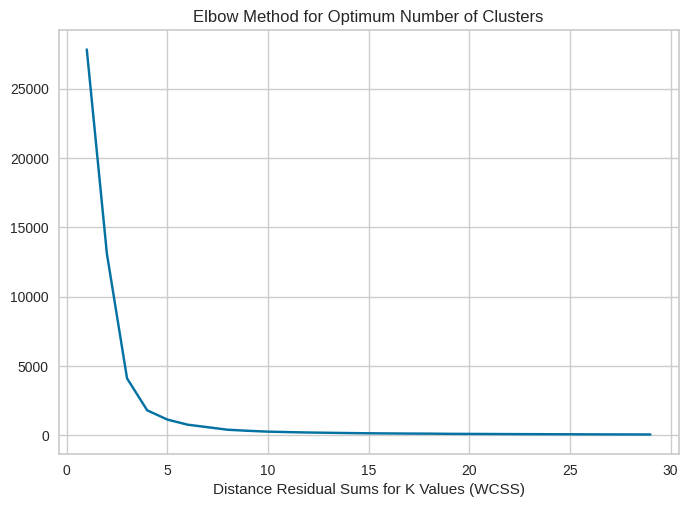

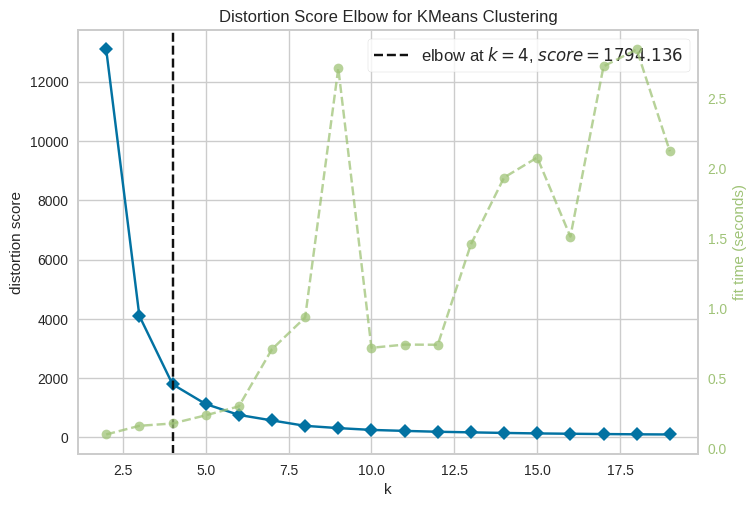

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# KMeans Clustering
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(sc_comb_data1)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(sc_comb_data1)
visu.show()

In [ ]:
kmeans = KMeans(n_clusters=4).fit(sc_comb_data1)
clusters = kmeans.labels_

pd.DataFrame({"Customers": data.index, "Clusters": clusters})
data1["cluster_no"] = clusters
data1.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Train,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,...,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,BalanceGroup,AgeGroup,cluster_no
0,Train,id_43823,28.0,11.0,single,3.0,no,285.0,yes,no,...,6,303.0,4.0,182.0,0,unknown,0,0-1000,25-35,0
1,Train,id_32289,34.0,5.0,married,2.0,no,934.0,no,yes,...,11,143.0,2.0,132.0,1,other,0,0-1000,25-35,1
2,Train,id_10523,46.0,8.0,married,2.0,no,656.0,no,no,...,2,101.0,4.0,182.0,0,unknown,0,0-1000,36-50,1
3,Train,id_43951,34.0,6.0,single,2.0,no,2.0,yes,no,...,5,127.0,3.0,182.0,0,unknown,0,0-1000,25-35,3
4,Train,id_40992,41.0,5.0,married,1.0,no,1352.0,yes,no,...,5,49.0,2.0,182.0,0,unknown,0,1001-5000,36-50,0


In [ ]:
kmeans = KMeans(n_clusters=4).fit(sc_comb_data1)
clusters = kmeans.labels_

pd.DataFrame({"Customers": data.index, "Clusters": clusters})
data1["cluster_no"] = clusters
data.head()

silhouette = silhouette_score(sc_comb_data1, data1["cluster_no"])
davies_bouldin = davies_bouldin_score(sc_comb_data1, data1["cluster_no"])
calinski_harabasz = calinski_harabasz_score(sc_comb_data1, data1["cluster_no"])

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Score:", calinski_harabasz)

Silhouette Score: 0.856387197365526
Davies-Bouldin Score: 0.35270038973707213
Calinski-Harabasz Score: 312507.338940277


#### Downloading the dataset and Model

In [ ]:
data1.to_excel('/content/Cluster_final_pred1.xlsx', index=False)

In [ ]:
import joblib
filename = 'kmeans.joblib'
joblib.dump(kmeans, open(filename, 'wb'))

In [ ]:
joblib.dump(db, open('db.joblib', 'wb'))

In [ ]:
joblib.dump(normalize, open('norm.joblib', 'wb'))

In [ ]:
joblib.dump(pca, open('pca.joblib', 'wb'))

In [ ]:
joblib.dump(imp_median, open('imp_median.joblib', 'wb'))

In [ ]:
joblib.dump(imp_mode, open('imp_mode.joblib', 'wb'))

In [ ]:
joblib.dump(standard, open('standard.joblib', 'wb'))

In [ ]:
joblib.dump(oe_e, open('oe_edu.joblib', 'wb'))
joblib.dump(oe_jt, open('oe_job.joblib', 'wb'))

#### Visualizing

In [ ]:
sc_comb_data1['cluster']=clusters
sc_comb_data1.head()

,PCA1,PCA2,cluster
0,-0.255703,-0.488818,1
1,-0.308329,0.445608,0
2,-0.415742,0.486398,0
3,0.902098,-0.264283,2
4,-0.284392,-0.498387,1


<Axes: xlabel='PCA1', ylabel='PCA2'>

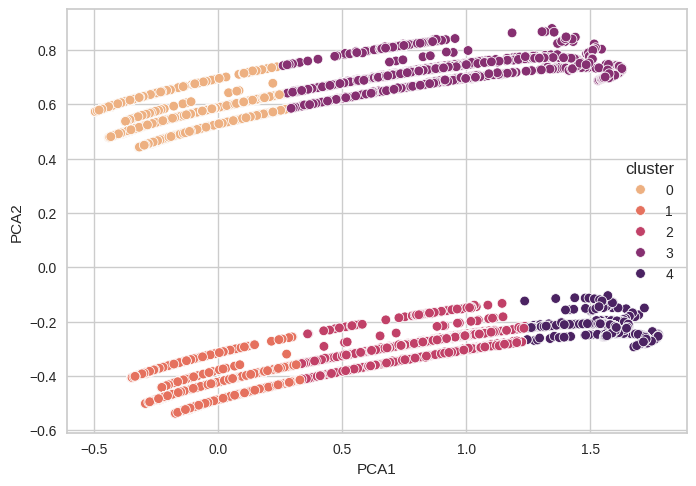

In [ ]:
sns.scatterplot(data=sc_comb_data1,x='PCA1',y='PCA2',hue = 'cluster',palette = "flare")

#### Agglomerative Clustering

In [ ]:
plt.figure(figsize=(14, 6))
hc_complete = linkage(sc_comb_data1, method='complete')
dendrogram_complete = dendrogram(hc_complete)
plt.title('Dendrogram - complete linkage')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
plt.figure(figsize=(14, 6))
hc_average = linkage(sc_comb_data1, method='average')
dendrogram_average = dendrogram(hc_average)
plt.title('Dendrogram - average linkage')
plt.ylabel('Euclidean distances')
plt.show()


In [ ]:
plt.figure(figsize=(14, 6))
hc_single = linkage(sc_comb_data1, method='single')
dendrogram_single = dendrogram(hc_single)
plt.title('Dendrogram - single linkage')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
agg= AgglomerativeClustering(n_clusters=3).fit(sc_comb_data1)
clusters = agg.labels_

pd.DataFrame({"Customers": data.index, "Clusters": clusters})
data["cluster_no_agg"] = clusters
data.head()

In [ ]:
silhouette = silhouette_score(sc_comb_data1, data["cluster_no_agg"])
davies_bouldin = davies_bouldin_score(sc_comb_data1, data["cluster_no_agg"])
calinski_harabasz = calinski_harabasz_score(sc_comb_data1, data["cluster_no_agg"])

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Score:", calinski_harabasz)

#### DBSCAN

In [ ]:
db = DBSCAN(eps=0.3, min_samples=10).fit(sc_comb_data1)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 2
Estimated number of noise points: 0


In [ ]:
print(f"Silhouette Coefficient: {silhouette_score(sc_comb_data1, labels):.3f}")

Silhouette Coefficient: 0.585


In [ ]:
labels.shape

(45211,)

In [ ]:
data1.shape

(45211, 18)

In [ ]:
sc_comb_data1.shape

(45211, 3)

In [ ]:
labels = pd.DataFrame({"Clusters": labels})
data1["cluster_no_db"] = labels
data1.head()

,Train,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,...,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,BalanceGroup,AgeGroup,cluster_no,cluster_no_db
0,Train,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,...,303.0,4.0,182.0,0,unknown,0,0-1000,25-35,0,0
1,Train,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,...,143.0,2.0,132.0,1,other,0,0-1000,25-35,1,1
2,Train,id_10523,46.0,technician,married,secondary,no,656.0,no,no,...,101.0,4.0,182.0,0,unknown,0,0-1000,36-50,1,1
3,Train,id_43951,34.0,services,single,secondary,no,2.0,yes,no,...,127.0,3.0,182.0,0,unknown,0,0-1000,25-35,2,0
4,Train,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,...,49.0,2.0,182.0,0,unknown,0,1001-5000,36-50,0,0


#### visualizing

In [ ]:
sc_comb_data1['cluster']=labels
sc_comb_data1.head()

,PCA1,PCA2,cluster
0,-0.255703,-0.488818,0
1,-0.308329,0.445608,1
2,-0.415742,0.486398,1
3,0.902098,-0.264283,0
4,-0.284392,-0.498387,0


<Axes: xlabel='PCA1', ylabel='PCA2'>

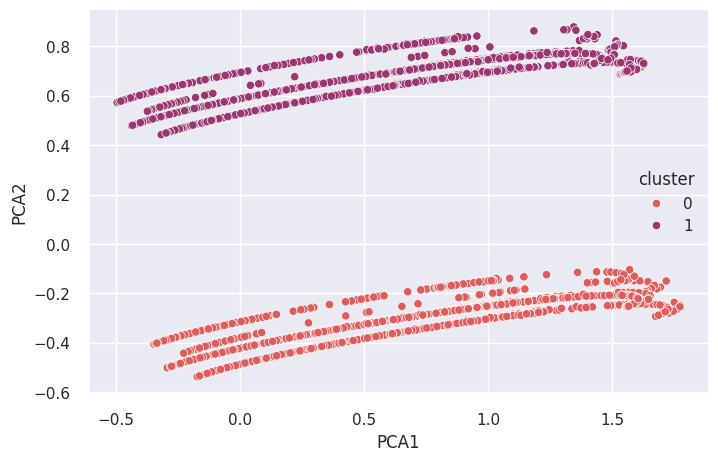

In [ ]:
sns.scatterplot(data=sc_comb_data1,x='PCA1',y='PCA2',hue = 'cluster',palette = "flare")

### 3.1.2 Feature Selelction using VarianceThreshold

In [ ]:
data2 = encode_categorical_columns(data1)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.25)

selected_features = selector.fit_transform(data2)

# Get the mask of selected features
feature_mask = selector.get_support()

selected_columns = data2.columns[feature_mask]
comb_data2 = pd.DataFrame(selected_features, columns=selected_columns)

In [ ]:
comb_data2.columns

Index(['customer_age', 'job_type', 'education', 'balance', 'day_of_month',
       'month', 'last_contact_duration', 'num_contacts_in_campaign',
       'num_contacts_prev_campaign'],
      dtype='object')

In [ ]:
sc_comb_data2 = scale_dataframe(comb_data2,'normalize')
sc_comb_data2=feature_reduction(sc_comb_data2,2,"Principal component analysis")
sc_comb_data2 = pd.DataFrame(sc_comb_data2)
sc_comb_data2

,PCA1,PCA2
0,0.075144,-0.277812
1,-0.470246,0.077183
2,-0.465509,0.075761
3,0.789216,-0.166163
4,-0.536010,0.172624
...,...,...
45206,-0.482208,0.094112
45207,-0.404711,0.001639
45208,0.041737,-0.264371
45209,0.059444,-0.268012


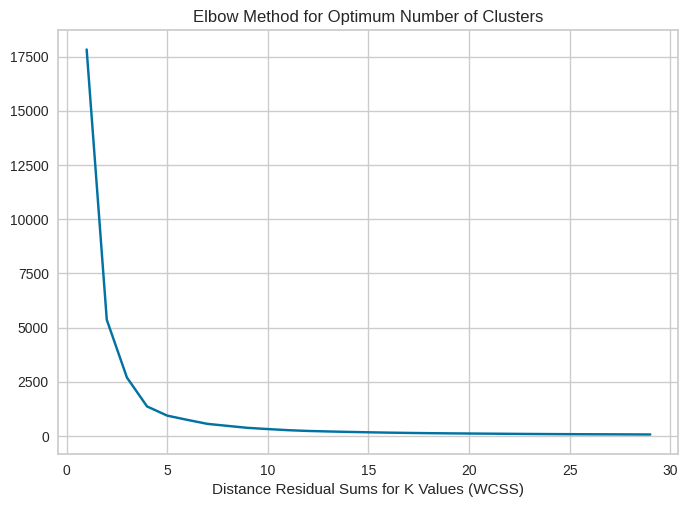

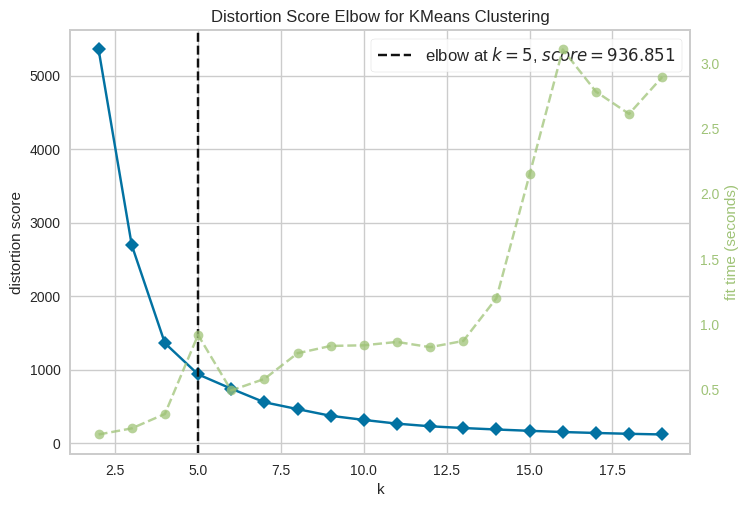

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# KMeans Clustering
kmeans = KMeans()
ssd = []
K = range(1, 30)

for k in K:
    kmeans = KMeans(n_clusters=k).fit(sc_comb_data2)
    ssd.append(kmeans.inertia_)

ssd

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums for K Values (WCSS)")
plt.title("Elbow Method for Optimum Number of Clusters")
plt.show()

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k=(2, 20))
visu.fit(sc_comb_data2)
visu.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(sc_comb_data2)
clusters = kmeans.labels_

pd.DataFrame({"Customers": data.index, "Clusters": clusters})
data["cluster_no2"] = clusters
data.head()

silhouette = silhouette_score(sc_comb_data2, data["cluster_no2"])
davies_bouldin = davies_bouldin_score(sc_comb_data2, data["cluster_no2"])
calinski_harabasz = calinski_harabasz_score(sc_comb_data2, data["cluster_no2"])

print("Silhouette Score:", silhouette)
print("Davies-Bouldin Score:", davies_bouldin)
print("Calinski-Harabasz Score:", calinski_harabasz)

Silhouette Score: 0.6195448253047867
Davies-Bouldin Score: 0.4905663761516509
Calinski-Harabasz Score: 203721.02070615944


# Week 4: Phase 4

## Presented in Tableau